In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

Purpose of this notebook is to compute and compare forecast changes in the EIA STEO monthly releases

In [22]:
# MEANDER THROUGH SPECIFIC FOLDERS AND CONCAT DATA INTO ONE DATAFRAME
def concat_dfs(folderpath, df_name):
    '''
    Purpose of this function is to grab all files from a specific area, concatenate them and then outpout them
    as a master df

    need to import os and pandas
    '''
    # creating any empty list where all datafiles will be stored
    dfs = []

    # grabbing all datafiles from the provided path
    for filename in os.listdir(folderpath):
        if filename.endswith('csv'):
            file_path= os.path.join(folderpath, filename)

            try: 
                # reading the csv file to make sure that it is good to go
                df = pd.read_csv(file_path)

                # adding to our master df
                dfs.append(df)

            except Exception as e: 
                print(f'error reading {filename}: {e}')
                continue # we must move forward king

    # concetanating all of our dfs
    master_df = pd.concat(dfs, axis=0)

    # resetting our index
    master_df = master_df.reset_index()

    # dropping the dumb 'index' column
    master_df = master_df.drop(columns='index', axis=1)

    # setting our period column to a date type
    master_df['period'] = pd.to_datetime(master_df['period'])

    # saving our file under 'master output'
    master_df.to_csv(f'master_output/{df_name}.csv', index=False)

    # letting the homies know everythig is good to go
    print('Master data has been successfully processed')

    print(master_df.info())




# trying this out with the wind data
##concat_dfs('output/wind', df_name='master_wind_data')
##concat_dfs('output/renewables', df_name='master_renewables_data')
##concat_dfs('output/battery', df_name='master_battery_data')
##concat_dfs('output/emissions' ,df_name='master_emissions_data')
##concat_dfs('output/solar', df_name='master_solar_data')
##concat_dfs('output/transportation', df_name='master_transport_data')
##concat_dfs('output/weather', df_name='master_weather_data')
##concat_dfs('output/naturalgas', df_name='master_ng_elecs_data')
    
# doing this but with all exisitng master data sets.. making a master master
## concat_dfs('master_output', df_name='master_master_data')

Master data has been successfully processed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162590 entries, 0 to 162589
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   period             162590 non-null  datetime64[ns]
 1   seriesId           162590 non-null  object        
 2   seriesDescription  162590 non-null  object        
 3   value              162590 non-null  float64       
 4   unit               162590 non-null  object        
 5   forecast_period    97160 non-null   object        
 6   forecast_month     65430 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 8.7+ MB
None


In [10]:
# here we are quickly checking our data
# first let's import our data
test_data = pd.read_csv('master_output/master_wind_data.csv')

# first, we need to ensure that our period colum is a date type
test_data['period'] = pd.to_datetime(test_data['period'])

# let's filter our data to only 2023 and forward
filtered_t_data = test_data[test_data['period'] >= '1/1/2023']

# checking the frarmwork and data type of each data colum in our df
print(filtered_t_data.info())




<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 3299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period             648 non-null    datetime64[ns]
 1   seriesId           648 non-null    object        
 2   seriesDescription  648 non-null    object        
 3   value              648 non-null    float64       
 4   unit               648 non-null    object        
 5   forecast_period    648 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 35.4+ KB
None


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

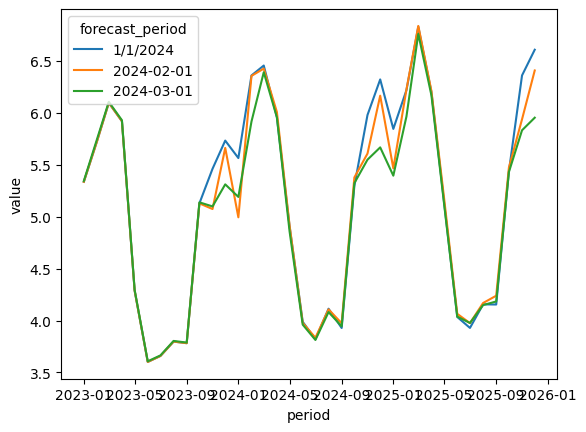

In [12]:

# now we want to initialize a figure
plt.figure()

# setting up a line plot
sns.lineplot(data=filtered_t_data, x='period', y='value', hue='forecast_period', errorbar=None)

